In [1]:
%load_ext autoreload
%autoreload 2

In [161]:
from helper import *
from pipe import *

In [ ]:
df_train = pd.read_csv('data/churn_train.csv', parse_dates=['last_trip_date','signup_date'])
df_test = pd.read_csv('data/churn_test.csv', parse_dates=['last_trip_date','signup_date'])

In [ ]:
df_train.head()

In [ ]:
df_train.dtypes

In [ ]:
report_nan(df_train_post)

In [ ]:
df_train.columns.tolist()

Make labels

In [ ]:
def make_label(df):
    df['churn'] = 1
    mask_not_churn = df_train['last_trip_date'] >= pd.to_datetime('2014-06-01')
    df.loc[mask_not_churn, 'churn'] = 0 
    return df, df.churn
df_train, y_train = make_label(df_train)
df_test, y_test = make_label(df_test)

In [ ]:
df_train, y_train = make_label(df_train)
df_test, y_test = make_label(df_test)

In [ ]:
df_train_post.head()

In [ ]:
df_train.churn.value_counts(1, dropna=False)

In [ ]:
X = df_train
y = y_train


p = Pipeline([
    ('pre_select', PreselectColumns()),
    ('dummify', Getdummies()),
    ('replace_nan', ReplaceNaN()),
#     ('filter', FilterColumns()),
#     ('type_change', DataType()),
#     ('encod_cat', EncodingOrdinalCat()),
#     ('regex', ExtractInfo()),
#     ('replace_outliers', ReplaceOutliers()),
#     ('compute_age', ComputeAge()),
#     ('nearest_price', ComputeNearestMean()),
#     ('interaction', Interaction()),
    ('dropcols', DropColumns()),
])
m = p.fit(X,y)
df_train_post = m.transform(X)
df_test_post = m.transform(df_test)

In [ ]:
df_test_post.head()

In [ ]:
df_train_post.head()

In [ ]:
df_corr = df_train_post.corr()
show_corr('churn', df_corr, df_train, nb=7)

In [ ]:
logit = LogisticRegression()
logit = logit.fit(df_train_post, y_train)

In [ ]:
test_y_pred = logit.predict(df_test_post)
test_y_pred_proba = logit.predict_proba(df_test_post)

In [ ]:
print('accuracy: ',accuracy_score(y_test, test_y_pred))
print('precision: ',precision_score(y_test, test_y_pred))
print('recall: ',recall_score(y_test, test_y_pred))
print('f1: ',f1_score(y_test, test_y_pred))
print('auc: ',roc_auc_score(y_test, test_y_pred))

In [ ]:
# accuracy:  0.5545
# precision:  0.626547933769
# recall:  0.71772394007
# f1:  0.669043904613
# auc:  0.498690204066

In [ ]:
df_train_post.head()

In [ ]:
df_test_post.head()

In [ ]:
# report_categories(df_train_post)

In [ ]:
report_numeric(df_train_post)

In [ ]:
check_subcat_cols(df_train_post, df_test_post)

In [17]:
df_train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,1
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,1
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,1
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,1
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,1


In [29]:
def bin_rides(in_df):
    if ('trips_in_first_30_days' in in_df.columns):
    #newcols = pd.DataFrame(dict('zero':))
        in_df['zero_rides'] = (in_df['trips_in_first_30_days'] == 0)
        in_df['one_rides'] = in_df['trips_in_first_30_days'] == 1
        in_df['few_rides'] = ((6> in_df['trips_in_first_30_days']) == (in_df['trips_in_first_30_days']> 1)) 
        in_df['many_rides'] = (in_df['trips_in_first_30_days'] >= 6)
#     in_df.drop('trips_in_first_30_days', axis=1, inplace=True)
    return in_df

In [30]:
df_temp = bin_rides(df_train)

In [31]:
df_temp.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,luxury_car_user,weekday_pct,churn,zero_rides,one_rides,few_rides,many_rides
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,False,100.0,1,True,False,False,False
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,True,0.0,1,False,False,True,False
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,True,100.0,1,False,True,False,False
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,False,100.0,1,False,True,False,False
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,False,100.0,1,True,False,False,False


## Basemodel

In [ ]:
['trips_in_first_30_days',
 'surge_pct',
 'weekday_pct',
 'avg_surge',
 'luxury_car_user',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_dist',
 'city_Astapor',
 'city_Winterfell',
 'city_nan',
 'phone_Android',
 'phone_iPhone']

In [65]:
df_train = pd.read_csv('data/churn_train.csv', parse_dates=['last_trip_date','signup_date'])
df_test = pd.read_csv('data/churn_test.csv', parse_dates=['last_trip_date','signup_date'])

def make_label(df):
    df['churn'] = 1
    mask_not_churn = df_train['last_trip_date'] >= pd.to_datetime('2014-06-01')
    df.loc[mask_not_churn, 'churn'] = 0 
    return df, df.churn

df_train, y_train = make_label(df_train)
df_test, y_test = make_label(df_test)

In [66]:
X = df_train
y = y_train

p = Pipeline([
    ('pre_select', PreselectColumns()),
#     ('binAverageRatingDistance', BinAvgRatDistance()),
    ('dummify', Getdummies()),
    ('replace_nan', ReplaceNaN()),
#     ('binrides', BinRides()),
    ('dropcols', DropColumns()),
#     ('minmax', MinMaxScaler()),
    ('logit', LogisticRegression()),
#     ('rf', RandomForestClassifier()),
])
# m = p.fit(X,y)
# df_train_post = m.transform(X)
# df_test_post = m.transform(df_test)
scores = cross_val_score(p, X, y, scoring='roc_auc', cv=5)
print(scores)
print(scores.mean())

[ 0.7593145   0.75990687  0.77089104  0.75989842  0.75948004]
0.761898173485


In [67]:
m = p.fit(X, y)
test_pred_proba = m.predict_proba(df_test)[:,1:]
test_y_pred = m.predict(df_test)
print('accuracy: ',accuracy_score(y_test, test_y_pred))
print('precision: ',precision_score(y_test, test_y_pred))
print('recall: ',recall_score(y_test, test_y_pred))
print('f1: ',f1_score(y_test, test_y_pred))
print('auc: ',roc_auc_score(y_test, test_pred_proba))

accuracy:  0.5545
precision:  0.626547933769
recall:  0.71772394007
f1:  0.669043904613
auc:  0.494986958079


## Model 2

In [139]:
df_train = pd.read_csv('data/churn_train.csv', parse_dates=['last_trip_date','signup_date'])
df_test = pd.read_csv('data/churn_test.csv', parse_dates=['last_trip_date','signup_date'])

def make_label(df):
    df['churn'] = 1
    mask_not_churn = df['last_trip_date'] >= pd.to_datetime('2014-06-01')
    df.loc[mask_not_churn, 'churn'] = 0 
    return df, df.churn

df_train, y_train = make_label(df_train)
df_test, y_test = make_label(df_test)

In [140]:
X = df_train
y = y_train

p = Pipeline([
    ('pre_select', PreselectColumns()),
    ('binAverageRatingDistance', BinAvgRatDistance()),
    ('dummify', Getdummies()),
    ('replace_nan', ReplaceNaN()),
    ('binrides', BinRides()),
    ('dropcols', DropColumns()),
#     ('minmax', MinMaxScaler()),
    ('logit', LogisticRegression()),
#     ('rf', RandomForestClassifier()),
])
# m = p.fit(X,y)
# df_train_post = m.transform(X)
# df_test_post = m.transform(df_test)
scores = cross_val_score(p, X, y, scoring='f1', cv=5)
print(scores)
print(scores.mean())

[ 0.79770957  0.79951215  0.80059998  0.79914211  0.79868668]
0.799130097263


In [89]:
df_train_post.head()

,avg_dist,luxury_car_user,weekday_pct,avg_surge,trips_in_first_30_days,avg_rating_of_driver,avg_rating_of_driver_no_rating,avg_rating_of_driver_4-5,avg_dist_0-3,avg_dist_3-10,iPhone,Astapor,Winterfell,True,city_Astapor,city_Winterfell,city_nan,phone_Android,phone_iPhone,zero_rides,one_rides,few_rides,many_rides
0,6.94,False,100.0,1.00,0,5.0,0,1,0,1,0,1,0,0,1,0,0,1,0,True,False,False,False
1,8.06,True,0.0,1.00,2,5.0,0,1,0,1,0,1,0,1,1,0,0,1,0,False,False,True,False
2,21.50,True,100.0,1.00,1,0.0,1,0,0,0,1,0,1,1,0,1,0,0,1,False,True,False,False
3,9.46,False,100.0,2.75,1,0.0,1,0,0,1,0,0,1,0,0,1,0,1,0,False,True,False,False
4,13.77,False,100.0,1.00,0,0.0,1,0,0,0,1,0,1,0,0,1,0,0,1,True,False,False,False


In [171]:
m = p.fit(X, y)
test_pred_proba = m.predict_proba(df_test)[:,1:]
test_y_pred = m.predict(df_test)
print('accuracy: ',accuracy_score(y_test, test_y_pred))
print('precision: ',precision_score(y_test, test_y_pred))
print('recall: ',recall_score(y_test, test_y_pred))
print('f1: ',f1_score(y_test, test_y_pred))
print('auc: ',roc_auc_score(y_test, test_pred_proba))

accuracy:  0.7701
precision:  0.790907744706
recall:  0.857578676943
f1:  0.822895000385
auc:  0.837151864702


In [172]:
(tn, fp, fn, tp) = confusion_matrix(y_test, test_y_pred).ravel()

In [173]:
print(tp, fp)
print(fn, tn)

5341 1412
887 2360


## Model 3

In [150]:
df_train = pd.read_csv('data/churn_train.csv', parse_dates=['last_trip_date','signup_date'])
df_test = pd.read_csv('data/churn_test.csv', parse_dates=['last_trip_date','signup_date'])

def make_label(df):
    df['churn'] = 1
    mask_not_churn = df['last_trip_date'] >= pd.to_datetime('2014-06-01')
    df.loc[mask_not_churn, 'churn'] = 0 
    return df, df.churn

df_train, y_train = make_label(df_train)
df_test, y_test = make_label(df_test)

In [151]:
X = df_train
y = y_train

p = Pipeline([
    ('pre_select', PreselectColumns()),
    ('binAverageRatingDistance', BinAvgRatDistance()),
    ('dummify', Getdummies()),
    ('replace_nan', ReplaceNaN()),
    ('binrides', BinRides()),
    ('dropcols', DropColumns()),
#     ('minmax', MinMaxScaler()),
    ('logit', LogisticRegression()),
#     ('rf', RandomForestClassifier()),
])
# m = p.fit(X,y)
# df_train_post = m.transform(X)
# df_test_post = m.transform(df_test)
scores = cross_val_score(p, X, y, scoring='roc_auc', cv=5)
print(scores)
print(scores.mean())

[ 0.78179242  0.78219853  0.791421    0.78260706  0.77945438]
0.78349467779


In [152]:
logit = p.fit(X, y)
test_pred_proba = logit.predict_proba(df_test)[:,1:]
test_y_pred = logit.predict(df_test)
print('accuracy: ',accuracy_score(y_test, test_y_pred))
print('precision: ',precision_score(y_test, test_y_pred))
print('recall: ',recall_score(y_test, test_y_pred))
print('f1: ',f1_score(y_test, test_y_pred))
print('auc: ',roc_auc_score(y_test, test_pred_proba))

accuracy:  0.722
precision:  0.74268018018
recall:  0.847141939627
f1:  0.791479147915
auc:  0.775302383584


## RandomForest

In [144]:
df_train = pd.read_csv('data/churn_train.csv', parse_dates=['last_trip_date','signup_date'])
df_test = pd.read_csv('data/churn_test.csv', parse_dates=['last_trip_date','signup_date'])

def make_label(df):
    df['churn'] = 1
    mask_not_churn = df['last_trip_date'] >= pd.to_datetime('2014-06-01')
    df.loc[mask_not_churn, 'churn'] = 0 
    return df, df.churn

df_train, y_train = make_label(df_train)
df_test, y_test = make_label(df_test)

In [155]:
X = df_train
y = y_train

p = Pipeline([
    ('pre_select', PreselectColumns()),
    ('binAverageRatingDistance', BinAvgRatDistance()),
    ('dummify', Getdummies()),
    ('replace_nan', ReplaceNaN()),
    ('binrides', BinRides()),
    ('dropcols', DropColumns()),
#     ('minmax', MinMaxScaler()),
#     ('logit', LogisticRegression()),
    ('rf', RandomForestClassifier(n_estimators=1000)),
])
# m = p.fit(X,y)
# df_train_post = m.transform(X)
# df_test_post = m.transform(df_test)
# scores = cross_val_score(p, X, y, scoring='roc_auc', cv=5)
# print(scores)
# print(scores.mean())

In [156]:
rf = p.fit(X, y)
test_pred_proba = rf.predict_proba(df_test)[:,1:]
test_y_pred = rf.predict(df_test)
print('accuracy: ',accuracy_score(y_test, test_y_pred))
print('precision: ',precision_score(y_test, test_y_pred))
print('recall: ',recall_score(y_test, test_y_pred))
print('f1: ',f1_score(y_test, test_y_pred))
print('auc: ',roc_auc_score(y_test, test_pred_proba))

accuracy:  0.7312
precision:  0.779886148008
recall:  0.791907514451
f1:  0.785850860421
auc:  0.799063520134


In [162]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [144]:
df_train = pd.read_csv('data/churn_train.csv', parse_dates=['last_trip_date','signup_date'])
df_test = pd.read_csv('data/churn_test.csv', parse_dates=['last_trip_date','signup_date'])

def make_label(df):
    df['churn'] = 1
    mask_not_churn = df['last_trip_date'] >= pd.to_datetime('2014-06-01')
    df.loc[mask_not_churn, 'churn'] = 0 
    return df, df.churn

df_train, y_train = make_label(df_train)
df_test, y_test = make_label(df_test)

In [165]:
X = df_train
y = y_train

p = Pipeline([
    ('pre_select', PreselectColumns()),
    ('binAverageRatingDistance', BinAvgRatDistance()),
    ('dummify', Getdummies()),
    ('replace_nan', ReplaceNaN()),
    ('binrides', BinRides()),
    ('dropcols', DropColumns()),
#     ('minmax', MinMaxScaler()),
#     ('logit', LogisticRegression()),
    ('ad', AdaBoostClassifier(n_estimators=1000)),
])
# m = p.fit(X,y)
# df_train_post = m.transform(X)
# df_test_post = m.transform(df_test)
# scores = cross_val_score(p, X, y, scoring='roc_auc', cv=5)
# print(scores)
# print(scores.mean())

In [166]:
ad = p.fit(X, y)
test_pred_proba = ad.predict_proba(df_test)[:,1:]
test_y_pred = ad.predict(df_test)
print('accuracy: ',accuracy_score(y_test, test_y_pred))
print('precision: ',precision_score(y_test, test_y_pred))
print('recall: ',recall_score(y_test, test_y_pred))
print('f1: ',f1_score(y_test, test_y_pred))
print('auc: ',roc_auc_score(y_test, test_pred_proba))

accuracy:  0.7701
precision:  0.790907744706
recall:  0.857578676943
f1:  0.822895000385
auc:  0.837151864702


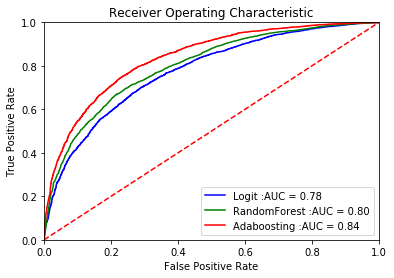

In [170]:
 #calculate the fpr and tpr for all thresholds of the classification
probs = logit.predict_proba(df_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

probs1 = rf.predict_proba(df_test)
preds1 = probs1[:,1]
fpr1, tpr1, threshold1 = roc_curve(y_test, preds1)
roc_auc1 = auc(fpr1, tpr1)

probs3 = ad.predict_proba(df_test)
preds3 = probs3[:,1]
fpr3, tpr3, threshold1 = roc_curve(y_test, preds3)
roc_auc3 = auc(fpr3, tpr3)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Logit :AUC = %0.2f' % roc_auc)
plt.plot(fpr1, tpr1, 'g', label = 'RandomForest :AUC = %0.2f' % roc_auc1)
plt.plot(fpr3, tpr3, 'r', label = 'Adaboosting :AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Model 4

In [124]:
mycol = df_train_post.columns.tolist()

In [133]:
mycol.remove(True)

In [134]:
mycol

['avg_dist',
 'luxury_car_user',
 'weekday_pct',
 'avg_surge',
 'trips_in_first_30_days',
 'avg_rating_of_driver',
 'avg_rating_of_driver_no_rating',
 'avg_rating_of_driver_4-5',
 'avg_dist_0-3',
 'avg_dist_3-10',
 'iPhone',
 'city_Astapor',
 'city_Winterfell',
 'city_nan',
 'phone_Android',
 'phone_iPhone',
 'zero_rides',
 'one_rides',
 'few_rides',
 'many_rides']